In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Загрузка данных
data = pd.read_csv('column_3C.dat', sep=' ', header=None)

In [3]:
print(data.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


In [4]:
# Зададим названия столбцов
columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope',
           'pelvic_radius', 'degree_spondylolisthesis', 'class']

# Присвоим названия столбцам
data.columns = columns

# Разделим данные на признаки и целевую переменную
X = data.drop('class', axis=1)
y = data['class']

In [5]:
# Разделим данные на обучающую и тестовую выборки в соотношении 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Логистическая регрессия
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# SVM
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

# Дерево решений
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

c:\Users\romas\OneDrive\Рабочий стол\ml_labs\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Логистическая регрессия
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

# SVM
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Дерево решений
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

# Вывод результатов
print("Метрики логистической регрессии:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1-score:", f1_logreg)
print()
print("Метрики SVM:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)
print()
print("Метрики дерева решений:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1-score:", f1_tree)

Метрики логистической регрессии:
Accuracy: 0.8387096774193549
Precision: 0.8354033695589673
Recall: 0.8387096774193549
F1-score: 0.836760014179369

Метрики SVM:
Accuracy: 0.8548387096774194
Precision: 0.8494623655913979
Recall: 0.8548387096774194
F1-score: 0.8518070989319236

Метрики дерева решений:
Accuracy: 0.7580645161290323
Precision: 0.7580645161290323
Recall: 0.7580645161290323
F1-score: 0.7580645161290323


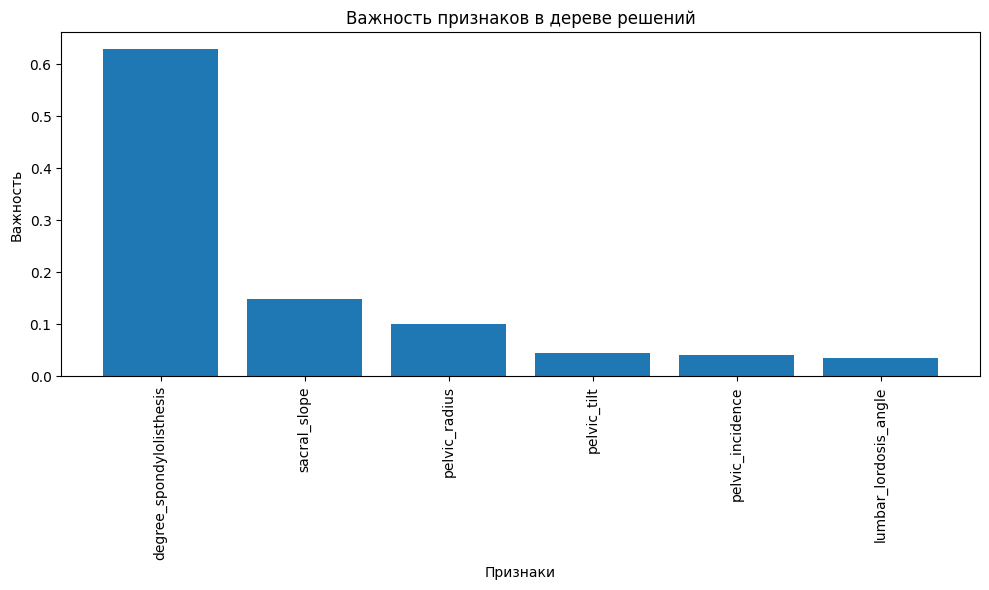

In [8]:
import matplotlib.pyplot as plt

# Получение важности признаков из дерева решений
importances = tree.feature_importances_

# Получение индексов признаков в порядке убывания важности
indices = np.argsort(importances)[::-1]

# Получение названий признаков в порядке убывания важности
feature_names = data.columns[:-1]  # Предполагается, что последний столбец - целевая переменная
feature_names_sorted = feature_names[indices]

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.title("Важность признаков в дереве решений")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names_sorted, rotation=90)
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.tree import export_graphviz
# Экспорт дерева решений в формате dot
dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, special_characters=True)


In [16]:
# Сохранение dot-данных в файл
with open("decision_tree.dot", "w") as f:
    f.write(dot_data)